<a href="https://colab.research.google.com/github/yoohyunseok/Machine-Learnig-Deep-Learning/blob/main/7_1ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras #keras 패키지
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data() #패션 MNIST 데이터셋 다운로드
#load_data() 메서드는 훈련 세트와 테스트 세트를 나누어 반환

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
print(train_input.shape, train_target.shape) #데이터 크기 확인

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


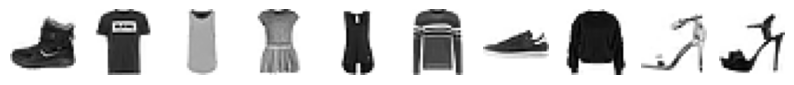

In [4]:
#이미지 확인 위해 샘플 10개 출력
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off') #x축, y축 표시 끄기
plt.show()

In [5]:
print([train_target[i] for i in range(10)])

[np.uint8(9), np.uint8(0), np.uint8(0), np.uint8(3), np.uint8(0), np.uint8(2), np.uint8(7), np.uint8(2), np.uint8(5), np.uint8(5)]


In [6]:
#패션 MNIST 데이터의 label값
label_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

print("Fashion MNIST Label Mapping:")
print("------------------------")
for i, name in enumerate(label_names): #enumerate(): 입력받은 객체의 각 요소에 인덱스를 함께 부여하여 반환하는 함수
#주로 루프를 돌면서 요소와 그 요소의 인덱스가 동시에 필요할 때 사용
    print(f"Label {i}: {name}")
#티셔츠, 바지, 스웨터, 드레스, 코드, 샌들, 셔츠, 스니커즈, 가방, 앵클 부츠

Fashion MNIST Label Mapping:
------------------------
Label 0: T-shirt/top
Label 1: Trouser
Label 2: Pullover
Label 3: Dress
Label 4: Coat
Label 5: Sandal
Label 6: Shirt
Label 7: Sneaker
Label 8: Bag
Label 9: Ankle boot


In [7]:
import numpy as np
print(np.unique(train_target, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


# 로지스틱 회귀로 패션 아이템 분류

In [8]:
train_scaled = train_input / 255.0 #이미지의 픽셀 값을 255로 나눠서 0~255인 값을 0~1 사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) #SGDClassifier는 1차원 배열을 전달해줘야함

In [9]:
print(train_scaled.shape)

(60000, 784)


In [10]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
#SGD 알고리즘은 모델의 가중치를 최적화 하는 최적화 알고리즘이다.(다양한 선형 분류 모델을 훈련하는데 사용)
#이런 대규모 데이터셋에선 데이터를 한번에 사용하는 방식보단 SGD를 사용하는 방식이 더 효율적이다.
sc = SGDClassifier(loss = 'log_loss', max_iter = 5, random_state = 42) #손실 함수를 log_loss로 지정하여 로지스틱 회귀 수행
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8194166666666666


In [11]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 9, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8304166666666667


In [12]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 20, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8437333333333334


# 인공 신경망(artificial neural network)

In [13]:
import tensorflow as tf

# Tensorflow
- 구글이 만든 **딥러닝 라이브러리**
- 그래픽 처리 장치인 GPU를 사용하여 인공 신경망을 훈련(딥러닝 라이브러리 특)
- GPU는 벡터와 행렬 연산에 최적화 되어있어서 곱셈과 덧셈을 많이하는 ANN에 큰 도움이 된다.
- keras
  - Tensor flow의 고수준 API
  - 직접 GPU 연산을 수행하지 않고 다른 라이브러리를 backend로 사용한다 ex) tensorflow, 씨아노, CNTK
  - 이런 케라스를 multi-backend-keras 라고 부름
  - keras만 잘 익혀놓으면 다양한 딥러닝 라이브러리 사용 가능

In [14]:
from tensorflow import keras

인공 신경망 분야 교차검증을 잘 하지 않고 검증 세트를 별도로 덜어내서 사용한다.

Why??
 1. 보통 데이터셋이 충분히 크기 때문에 검증 점수가 안정적
 2. 교차 검증까지 하면 너무 오래걸림

In [15]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [16]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [17]:
#출력층(밀집층(dense layer) 사용) 만들기
#왜 밀집층인가요? 굉장히 선이 빽빽하게 이어져있기 때문
#완전연결층(fully connected layer): 양쪽의 뉴런이 모두 연결하고 있는 층
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# Dense(뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기)
# 이진 분류라면 activation = 'sigmoid'
# 10개의 뉴런이 각각 몇개의 입력을 받는지 튜플로 지정한다. 여기서는 뉴런 하나가 784개의 특성(픽셀)을 받아유

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


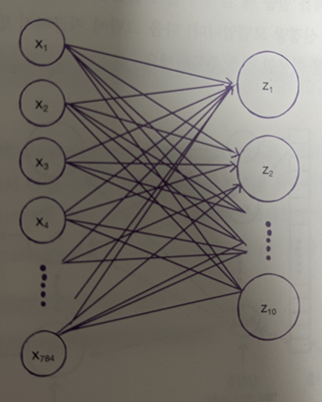

**굉장히 빽빽함**

기억 해야 할 것
1. 출력의 뉴런 마다 절편이 더해진다
2. 활성화 함수(activation function): 뉴런의 선형 방정식 계산 결과에 적용되는 함수

    2-1. 이진 분류에선 sigmoid, 다중 분류에선 softmax

In [18]:
#신경망 모델 생성
model = keras.Sequential([dense])#Sequential 클래스: 신경망 모델을 만드는 클래스
# 신경망 모델에 추가할 층을 지정할 수 있음...추가할 층이 한개 이상이면 파이썬 리스트로 전달

In [19]:
#모델 훈련 전 설정
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #손실 함수 지정
#sparse_categorical_crossentropy => 다중 분류이고 정수로된 타깃 값을 이용해 크로스 엔트로피 손실을 계산
#categorical_crossentropy => 타깃 값을 원-핫 인코딩으로 준비했고 다중 분류일 때 사용하는 손실 함수
#binary_crossentropy => 이진 분류

In [20]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [21]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7438 - loss: 0.7795
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8360 - loss: 0.4800
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8437 - loss: 0.4550
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8499 - loss: 0.4440
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8558 - loss: 0.4262


In [22]:
#검증 세트로 모델 평가
model.evaluate(val_scaled, val_target) #evaluate(): 모델 성능 평가

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8459 - loss: 0.4439


[0.4523680806159973, 0.8455833196640015]